![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png)

# <center> LESSON 5: Introduction to PANDAS </center>

## 1. INTRODUCTION

### 1.1 What is Pandas? 

`Pandas = Panel Data`

nghĩa là bảng dữ liệu, thư viện mã nguồn mở để xử lý dữ liệu, hoàn toàn đọc được source course
pandas github (search), sử dụng hàng ngàyd
đọc thư viện documentation of pandas. pandas-dev.pandas để đọc
chia hai buổi:
buổi 1: hàm cơ bản
buôi 2: hàm phức tạp và áp dụng với tập dữ liệu để phân tích
pandas được ưa chuộng vì: khi phải làm việc với dữ liệu có cấu trúc (dạng bảng, chuỗi thời gian -time series, chuỗi và xây dựng mô hình, sidekicler)
phù hợp vs dạng dữ liệu khác nhau (SQL, Excel, csv), 
ma trận ít chiều cũng có thể sử dụng pandas, 
ngoài ra, giúp dễ dàng thao tác, phân tích, trực quan hóa dữ liệu-plot hình ảnh cơ bản vs pandas. hoặc dùng matpotlit
...

### 1.2 Installation

- Cài đặt khi tạo môi trường ảo:
```
conda create -n hanh python=3.7 pandas
```
- Cài đặt sau khi tạo xong môi trường ảo:
```
conda install pandas
```
hoặc 
```
pip install pandas
```

### 1.3 Import 

In [1]:
import pandas as pd

**Reference**: 
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Python for Data Analysis](https://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf)

## 2. BASICS

### 2.1 Objects in Pandas

- **DataFrame**: table, `pd.DataFrame()`
- **Series**: column, `pd.Series()`

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)
![](https://analyticssavvy.com/wp-content/uploads/2020/05/series-and-dataframe.png)


#### 2.1.1 How to create a DataFrame

1. Tạo ra 1 DataFrame rỗng

In [2]:
#đặt viết tắt df
df= pd.DataFrame()
df

""


In [3]:
type(df)

pandas.core.frame.DataFrame

2. Tạo ra 1 DataFrame từ dict

In [4]:
dict1={'name': ['cuong','Hoa', 'mai', 'nghia'], 'age': [10, 5, 18, 20], 'university': ['MIT', 'HV', 'NYU', 'YONSI']}
#tạo 1 dict1 thì sử dụng syntax, key và value là unique, value có thể là 1 list, các cặp key cùng phần tử= lưu ý
# lưu ý có thể đổi tên index or colunm
df1= pd.DataFrame(dict1, index=[f'student{i}' for i in range (1,5)])
df1


,name,age,university
student1,cuong,10,MIT
student2,Hoa,5,HV
student3,mai,18,NYU
student4,nghia,20,YONSI


3. Tạo ra 1 DataFrame từ list của list

In [5]:
li= [['Cuong',10, 'MIT'], ['MAI', 20, 'Harvard'], ['pha', 25, 'NYU']]
df2= pd.DataFrame(li, columns =['name', 'age', 'university'])
df2

,name,age,university
0,Cuong,10,MIT
1,MAI,20,Harvard
2,pha,25,NYU


4. Tạo ra 1 DataFrame từ zip

In [6]:
name= ['cuong','Hoa', 'mai', 'nghia']
age= [10, 5, 18, 20]
university= ['MIT', 'HV', 'NYU', 'YONSI']
# zip giúp match từng phần tử theo index trên từng cái list với nhau, k cần phản convert sang dạng li
df3= pd.DataFrame(list(zip(name, age, university)))
df3
#add kiểu nó về 1 trong 4 cấu trúc dữ liệu mà đã học thì mới thì mới đọc được thành phần trong zip => list(zip())
#thêm thông số column
# thuần dữ liệu dạng bảng

,0,1,2
0,cuong,10,MIT
1,Hoa,5,HV
2,mai,18,NYU
3,nghia,20,YONSI


5. Tạo từ 1 chuỗi numpy

In [7]:
import numpy as np
df4= pd.DataFrame(np.linspace(1,16, 16).reshape(4, 4))
df4

,0,1,2,3
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,9.0,10.0,11.0,12.0
3,13.0,14.0,15.0,16.0


mình hoàn toàn có thể đọc hiểu lỗi, thì hỏi google "trang từ điển sống của developer"; stackoverflow.com để check lỗi cho nhiều ngôn ngữ khác nhau., chủ động đặt câu hỏi lên trên này. sẽ có nhà phát triển khác biết cách sửa thì họ sẽ trả lời để tham khảo và áp dụng vào case của mình

#### 2.1.2 How to create a Series

series tương ứng với cột: duy nhất
có hai cách:
    tạo series độc lập, truyền list duy nhất
    

In [8]:
type(pd.Series({'name':['Cuong', 'Nghia', 'Mai']}))

pandas.core.series.Series

In [9]:
df2 # muốn sử dụng cột name, thì có thể dùng series, gọi dataframe[tên của cột muốn sử dụng]

,name,age,university
0,Cuong,10,MIT
1,MAI,20,Harvard
2,pha,25,NYU


In [10]:
df2['name'] # đây là cách 1

0    Cuong
1      MAI
2      pha
Name: name, dtype: object

In [11]:
df2.name #cách 2, để lấy cột.

0    Cuong
1      MAI
2      pha
Name: name, dtype: object

tại sao lại có hai cách tạo tên =series như vậy? nếu có chức năng như nhau?
=>muốn lấy nhiều hơn 1 cột
tên liền nhau, k có dấu space thì có thể dùng hai cách, nhưng nếu tên của column cach nhau, thì c2 không hiểu được và k lấy được dữ liệu trong cột

In [12]:
df2['name'],['age']

(0    Cuong
 1      MAI
 2      pha
 Name: name, dtype: object,
 ['age'])

### 2.2 I/O

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

dạng bảng có nhiều cách khác nhau để đọc dữ liệu bảng:

pd.read_{tên_kieu_file}: pd.read_csv(), pd.read_excel, pd.read_sql()
muốn save thì dùng:

pd.to_{ten_kieu_file}: pd.to_csv(), to_excel()
- csv= commas seperated value
- tsv= tab separated value
- data cũng là dạng txt
- txt (csv, tsv là dạng txt cách nhau bởi dấu phẩy, hoặc tab), không giới hạn truyền vào bao nhiêu dòng, đọc và save thì cùng 1 file nhẹ hơn rất nhiều khi save dưới dạng excel.
- excel giới hạn số dòng nhập vào.
để đọc được file csv, sử dụng câu lệnh
df= pd.read_csv(trỏ path của file đã lưu)


In [13]:
df= pd.read_csv('Ecommerce Purchases')
df.head(5)# đọc 5 dòng đầu, df.sample(5) lấy 5 mẫu random, df.tail() lấy bao nhiêu dòng cuối

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\r\nAlexisborough, NE ...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\r\nSouth John, TN...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\r\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\r\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\r\nNew Cynthia, TX...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [14]:
#đọc file trên internet
iris= pd.read_csv('iris.data', header= None) #file này đã lưu về local máy rồi.
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
#iris=pd.read_csv(truyền link vào) => đỡ mất thêm bộ nhớ
#iris.head(5)

trong Python có xây sẵn sample data, ngoài hai cách trên, hoàn toàn có thể load từ các thư viện đó
vd: seabon = học về data visualization.

In [16]:
import seaborn as sns
iris2= sns.load_dataset('iris') 
# function hỗ trợ sample để làm quen vs phân tích dữ liệu, hàm này cần truyền vào cái gì "tên dataset"
#link github có đuôi csv (seaborn data), để thực hành phân tích dữ liệu
iris2.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
iris.to_csv('sample_iris.csv')

### 2.3 Indexing

In [18]:
import seaborn as sns
tips_df= sns.load_dataset('tips')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips_df['total_bill'] #đây là 1 cách lấy dữ liệu, pandas hỗ trợ 4 hàm thực hiện lấy dữ liệu, điểm dữ liệu, data frame con
#thông qua câu lệnh
# loc: location, iloc= index location. i-cái truyền vào là index chứ k phải tên.
#tên biến.loc -tên hàng muốn lấy, tên cột muốn lấy, lấy series thì chỉ có 1 cột duy nhất=> truyền vào tên của hàng muốn lấy
#at, iat chỉ lấy 1 điểm dữ liệu trong data frame
# lấy nhiều điểm dữ liệu hơn thì chỉ dùng loc or iloc



0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

Chọn tất cả các dòng (slicing):
- `loc`: location `df.loc[row_label,col_label]`, `series.loc[row_label]`
- `iloc`: index location `df.iloc[row_index,col_index]`, `series.iloc[row_index]`

Chọn 1 cell:
- `at`:  `df.at[row_label,col_label]`
- `iat`: `df.iat[row_index,col_index]`

In [20]:
tips_df.loc[1, 'total_bill']

10.34

In [21]:
tips_df.iloc[1, 0]

10.34

In [22]:
tips_df.iat[1, 0]

10.34

In [23]:
tips_df.at[1, 'total_bill']

10.34

In [24]:
# in ra 6 dòng đầu tiên từ cột total_bill đến sex
#dâu : điểm đầu là điểm bắt đầu lấy và sau => 
# trỏ điểm nào thì lấy điểm đó
tips_df.loc[:4, :'sex']

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [25]:
tips_df.iloc[:5, :3]
#luu ý: index luôn đi theo quy tắc, inclusive start, exclusive end nên phải cộng thêm 1 cho index

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [26]:
#=> trả về series theo cột, k đẹp như data frame, nếu muốn biến series thành data frame thì pandas có 3 cách.
#cách 1
tips_df['total_bill'].to_frame()
# chỉ in ra 5 dòng đầu, 5 dòng cuối => mong muốn in ra tất cả các dòng (1000 hàng hoặc lớn hơn) thì process rất lâu. 
# trong pandas có hỗ trợ hàm pd.options.display.max_rows= 243 or None pd.options.display.max_columns= None
# nếu dữ liệu quá nhiều thì k khuyến khích dùng hàm này, tips_df.describe() => đánh giá sự phân bố dữ liệu.khi học matpotlibe trực quan hóa dữ liệu


,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [27]:
#cách 2
pd.DataFrame(tips_df['total_bill'])

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [28]:
#cách 3, biến đổi series thành 1 DF có 1 cột
tips_df[['total_bill']]

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [29]:
tips_df.loc[ 3:4 ,:'time']

,total_bill,tip,sex,smoker,day,time
3,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner


In [30]:
tips_df.iloc[ 3:5 ,:6]

,total_bill,tip,sex,smoker,day,time
3,23.68,3.31,Male,No,Sun,Dinner
4,24.59,3.61,Female,No,Sun,Dinner


In [31]:
pd.options.display.max_rows= None
pd.options.display.max_columns= None

In [32]:
# thao tác manipulate dữ liệu (chuẩn hóa, làm sạch dữ liệu thì sẽ đi sâu trong buổi học về machine learning)

### 2.4 Masking

giúp lọc dữ liệu cần trong TH có sẵn các điều kiện rồi

In [33]:
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


có ba cách để lọc dữ liệu:
- cách 1: df_name.loc[conditions]
- cách 2: df_name[conditions]
- cách 3: df_name.query(conditions)

In [34]:
#lọc ra tất cả các thông tin của Kh là Nữ với tips_df

In [35]:
tips_df.loc[tips_df['sex']=='Female'].head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [36]:
tips_df[tips_df['sex']=='Female'].head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [37]:
tips_df.query("sex=='Female'").head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


#lọc ra tất cả các thông tin của Kh là Nữ với tips_df và có hút thuốc
đk 1: là nữ
dk 2: hút thuốc
mối tương quan là "và"

In [38]:
condition =( tips_df['sex']=='Female')& (tips_df['smoker']=='Yes') # # là dấu hoặc
tips_df.loc[condition].head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2


In [39]:
condition =( tips_df['sex']=='Female')& (tips_df['smoker']=='Yes') # # là dấu hoặc
tips_df[condition].head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2


In [40]:
tips_df.query("sex=='Female'& smoker=='Yes'").head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2


1. Lọc tất cả các bản ghi chứa thông tin KH là nam mà có tổng hóa đơn lớn hơn 10.
2. Lọc tất cả các bản ghi chứa thông tin KH không hút thuốc, dùng suất ăn cho 3 người trở lên
3. Lọc tất cả các bản ghi chứa thông tin KH là nữ ăn tối vào nhà hàng vào cuối tuần và tip cho nhân viên từ 5 usd trở lên

In [41]:
tips_df.query("sex=='Male'& total_bill >10").head(3)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [42]:
tips_df.query("smoker=='No'& size >=3").head(3)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
tips_df.query("sex=='Female'& time== 'Dinner'& day==('Sun','Sat') & tip >=5").head(10)

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
73,25.28,5.00,Female,Yes,Sat,Dinner,2
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [44]:
condition = (tips_df['sex'] == 'Female') & (tips_df['time'] == 'Dinner') & (tips_df['day'].str.startswith("S")) & (tips_df['tip'] >= 5)  

tips_df.loc[condition]


,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
73,25.28,5.00,Female,Yes,Sat,Dinner,2
155,29.85,5.14,Female,No,Sun,Dinner,5
214,28.17,6.50,Female,Yes,Sat,Dinner,3


### 2.5 Operations

#### 2.5.1 Groupby

là 1 hàm chia dữ liệu thành nhóm riêng biệt, chức năng giống groupby ở SQL
chia ba bước: Split, Apply, Combine dựa trên tập dữ liệu cho trước
bản ghi k phải unique chứa nhiều giá trị trùng nhau:

- split: chia dữ liệu thành các nhóm riêng biệt, 
- apply: tính toán độc lập cho từng group, tính toán theo công thức khác nhau. (Thao tác: tính tổng, tính min, tính trung bình....), giúp chuyển hóa lấp đầy giá trị Noon, missing data
- Combine: tổng hợp kết quả từ split + apply để tạo ra data frame


![](https://blog.dask.org/images/split-apply-combine.png)

syntax: groupby()

In [45]:
tips_df.head(3) #tail(), sample()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


tính trung bình số tiền mà mỗi giới tính phải trả khi ăn tại nhà hàng này


In [46]:
tips_df.groupby('sex').total_bill.mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [47]:
tips_df['total_bill_tip']= tips_df['total_bill'] + tips_df['tip']
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51


In [48]:
tips_df.groupby('sex').total_bill_tip.mean().to_frame()

,total_bill_tip
sex,
Male,23.833694
Female,20.890345


- Số tiền lớn nhất mà KH chi trả
- Số tiền nhỏ nhất mà KH chi trả
- và trung bình hóa đơn và số tiền
- theo mỗi giới tính 

In [49]:
tips_df.groupby('sex').agg({'total_bill':['max', 'min', 'mean'], 'tip':['max', 'min', 'mean']})
#agg mình có thể truyền nhiều hơn 1 phép tính, 1 cột => theo cấu trúc dictionary {key: [value]}

total_bill                    tip               
              max   min       mean   max  min      mean
sex                                                    
Male        50.81  7.25  20.744076  10.0  1.0  3.089618
Female      44.30  3.07  18.056897   6.5  1.0  2.833448

In [50]:
tips_df.groupby('sex').agg(mean_total_bill_tip=('total_bill_tip', 'mean'), mean_total_bill=('total_bill', 'mean')) 
# truyền vào 1 tuple 
#ký tự viết liền nhau, k bắt đầu bằng số, cách nhau bằng dấu gạch dưới

,mean_total_bill_tip,mean_total_bill
sex,,
Male,23.833694,20.744076
Female,20.890345,18.056897


có thể kết hợp cả condition, sau rồi .groupby...

bài tập:
Tính tổng: có thể dùng hàm sum() hàm buildin trong python
1. tính tổng doanh thu của nhà hàng theo thời gian dùng bữa của khách hàng theo tiền tips_df (bao gồm tips)
2. tính tổng doanh thu của nhà hàng theo thời gian dùng bữa của khách hàng không hút thuốc vào ngày chủ nhật (Không bao gồm tips)

In [51]:
#bài tập 1
tips_df.groupby('time').total_bill_tip.sum().to_frame()

,total_bill_tip
time,
Lunch,1352.98
Dinner,4206.37


In [52]:
#bài tập 2
tips_df.query("smoker=='No' & day=='Sun'").groupby('time').total_bill.sum().to_frame()

,total_bill
time,
Lunch,0.00
Dinner,1168.88


In [53]:
tips_df.query("smoker=='No' & day=='Sun'").groupby('time').agg(sum_total_bill=('total_bill','sum'))


,sum_total_bill
time,
Lunch,0.00
Dinner,1168.88


#### 2.5.2 Pivot

cũng theo cơ chế của groupby, dùng để phân tích dữ liệu đa chiều, còn groupby thì là 1 chiều
Thông thường sử dụng chuộng 1 cách.

tính trung bình số tiền mỗi giới tính trả khi ăn tại nhà hàng.

<AxesSubplot:xlabel='sex'>

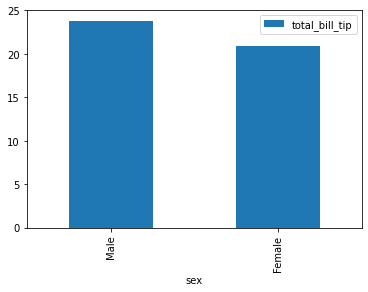

In [54]:
# tương ứng với giá trị mà mình sử dụng để tính toán -total_bill_tip
tips_df.pivot_table(values= 'total_bill_tip', index= 'sex', aggfunc='mean').plot.bar()
#trả về kết quả tương tự như hàm groupby
# trả về kq là data Frame, do tips_df cũng là DF

<AxesSubplot:xlabel='sex'>

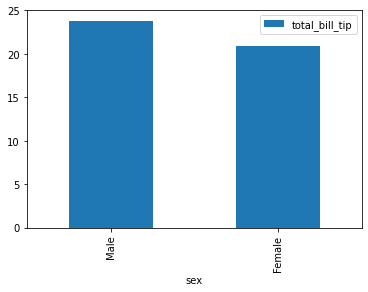

In [55]:
tips_df.pivot_table(values= 'total_bill_tip', index= 'sex', aggfunc='mean').plot(kind='bar')

trực quan hóa dữ liệu trên jupyter lab luôn để trao đổi internal, hoặc có thể dùng trên VBA or Power BI

#### 2.5.3 Others/ concatenation/Join/Merge

Pandas là Panel data để xử lý dữ liệu, thì còn có function để trực quan hóa dữ liệu như
matpotlit và seaborn.

|Merge methods| SQL Join Name | Meaning| _merge|
|-|-|-|-|
|left| LEFT OUTER JOIN|Chỉ sử dụng keys bên trái|left_only|
|right| RIGHT OUTER JOIN|Chỉ sử dụng keys bên phải|right_only|
|outer|FULL OUTER JOIN|Sử dụng keys của cả 2 dataframes|both|
|inner|INNER JOIN|Chỉ sử dụng keys giao nhau của 2 dataframes|both|

![](https://lh3.googleusercontent.com/-n76c6dtr5sw/YBO5d-3PzGI/AAAAAAAAAh8/xiT6YIzePLEXArb8uU1f1vgg8JRXYeg8ACLcBGAsYHQ/image.png) 

In [56]:
#1
left=tips_df.head(6)
#2
right=tips_df.loc[4:8]
left

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20
5,25.29,4.71,Male,No,Sun,Dinner,4,30.00


In [57]:
right

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20
5,25.29,4.71,Male,No,Sun,Dinner,4,30.00
6,8.77,2.00,Male,No,Sun,Dinner,2,10.77
7,26.88,3.12,Male,No,Sun,Dinner,4,30.00
8,15.04,1.96,Male,No,Sun,Dinner,2,17.00


In [58]:
left=tips_df.head(6)[['total_bill', 'tip']].reset_index()

In [59]:
left

,index,total_bill,tip
0,0,16.99,1.01
1,1,10.34,1.66
2,2,21.01,3.50
3,3,23.68,3.31
4,4,24.59,3.61
5,5,25.29,4.71


In [60]:
right=tips_df.loc[4:8][['tip','sex']].reset_index()
right

,index,tip,sex
0,4,3.61,Female
1,5,4.71,Male
2,6,2.00,Male
3,7,3.12,Male
4,8,1.96,Male


In [61]:
# merge: hàm nối hai dữ liệu với nhau.=> truyền tham số vào hàm merge
left.merge(right,how= 'left', on=['index', 'tip'])
#index trùng nhau, tip cũng trùng nhau nên nó sẽ tách, muốn tránh tip trùng thf truyền nhiều hơn 1 key, 
# cụm key, list key

,index,total_bill,tip,sex
0,0,16.99,1.01,NaN
1,1,10.34,1.66,NaN
2,2,21.01,3.50,NaN
3,3,23.68,3.31,NaN
4,4,24.59,3.61,Female
5,5,25.29,4.71,Male


In [62]:
left.merge(right,how= 'right', on=['index', 'tip'])

,index,total_bill,tip,sex
0,4,24.59,3.61,Female
1,5,25.29,4.71,Male
2,6,NaN,2.00,Male
3,7,NaN,3.12,Male
4,8,NaN,1.96,Male


In [63]:
left.merge(right,how= 'inner', on=['index', 'tip'])

,index,total_bill,tip,sex
0,4,24.59,3.61,Female
1,5,25.29,4.71,Male


In [64]:
left.merge(right,how= 'outer', on=['index', 'tip'])

,index,total_bill,tip,sex
0,0,16.99,1.01,NaN
1,1,10.34,1.66,NaN
2,2,21.01,3.50,NaN
3,3,23.68,3.31,NaN
4,4,24.59,3.61,Female
5,5,25.29,4.71,Male
6,6,NaN,2.00,Male
7,7,NaN,3.12,Male
8,8,NaN,1.96,Male


nhiều bảng có key chung thì hoàn toàn nối được
nếu dữ liệu có cùng format, cột tương đồng nhau, số lượng bản ghi ở dưới khác nhau,
khi DA thì phải kết hợp cả 2 file, thuận tiện hơn cho việc đánh giá thì phải nối dữ liệu thông qua hàm
pd.concate()

In [65]:
tips_df.sample(3) #(or tail or head thì tùy nhu cầu)

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
34,17.78,3.27,Male,No,Sat,Dinner,2,21.05
108,18.24,3.76,Male,No,Sat,Dinner,2,22.00
87,18.28,4.00,Male,No,Thur,Lunch,2,22.28


In [66]:
# nối ba bản ghi đầu tiên hoặc cuối cùng 
#=> truyền bên trong tập hợp các Data frame có cugnf format mà mình muốn nối với nhau
pd.concat([tips_df.head(3), tips_df.tail(3), tips_df.sample(3)])
#lưu ý: phải để dạng list nên phải có dấu []

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
241,22.67,2.00,Male,Yes,Sat,Dinner,2,24.67
242,17.82,1.75,Male,No,Sat,Dinner,2,19.57
243,18.78,3.00,Female,No,Thur,Dinner,2,21.78
115,17.31,3.50,Female,No,Sun,Dinner,2,20.81
170,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
148,9.78,1.73,Male,No,Thur,Lunch,2,11.51


In [67]:
#dùng hàm for vong lap để nối các df có cùng format thì sẽ tiết kiệm thời gian